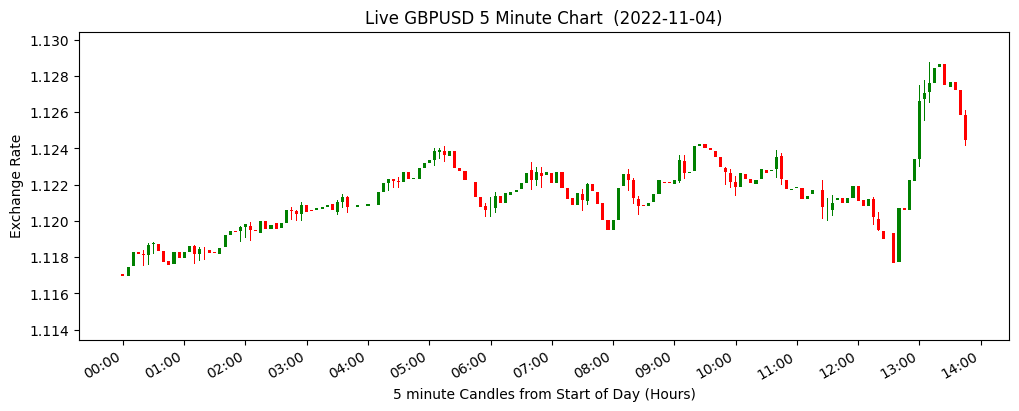

In [1]:
#!/usr/bin/python3


import urllib.request as urllib
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Interval="5" # 5 or 15 
APIKEY = ""#Add APIKEY from www.alphavantage.co
url="https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval="+Interval+"min&outputsize=full&apikey="+APIKEY+"&datatype=csv"
url
response = requests.get(url)


# the content is of type bytes use BypesIO to read 
from io import BytesIO

df = pd.read_csv(BytesIO(response.content))


# Add new column 
df=df.assign(Currency= "GBPUSD")
df=df.assign(TimeFrame= Interval+"Min")



# Split timestamp into two new columes
df[['Date', 'Time']] = df['timestamp'].str.split(' ', expand=True)

df.head()

df.shape[0]

df3=df


df3.head(10)

df3.shape[0]

# data for today only
filt= df3["Date"] == datetime.now().isoformat()[0:10]
df4=df3.loc[filt]

df4

df4.shape[0]

# Sort and reindex
df4 = df4.sort_index(axis=0 ,ascending=False)

df4.reset_index(inplace=True, drop=True)

df4

#plt.figure()
fig= plt.figure(figsize=(12,4))

up = df4[df4.close >= df4.open]
down = df4[df4.close < df4.open]

col1= 'green'
col2 = 'red'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right

labels = ["00:00","01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00","20:00", "21:00", "22:00", "23:00"]
if (Interval == "15") : plt.xticks(np.arange(0, 96, step=4), labels, rotation=30, ha='right')
if (Interval == "5") :plt.xticks(np.arange(0, 280, step=12), labels, rotation=30, ha='right')
#plt.xticks(x, labels, rotation ='vertical')
#plt.xticks(rotation=30, ha='right')


plt.title("Live GBPUSD "+Interval+" Minute Chart  ("+ df4.Date[0]+")")
plt.xlabel(Interval+' minute Candles from Start of Day (Hours)')
plt.ylabel('Exchange Rate')


plt.plot()
#plt.savefig('1min-2.png')
plt.show()

